DecisionTree.ipynb - AI Training Software  
Copyright (C) 2024 AI Institute, University of South Carolina

Authors:    Homayoun Valafar
            Andrew Smith
            Christopher Lee
            Alireza Bagheri
            Musa Azim
         

This program is free software: you can redistribute it and/or modify  
it under the terms of the GNU General Public License as published by  
the Free Software Foundation, either version 3 of the License, or  
(at your option) any later version.  

This program is distributed in the hope that it will be useful,  
but WITHOUT ANY WARRANTY; without even the implied warranty of  
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the  
GNU General Public License for more details.  

You should have received a copy of the GNU General Public License  
along with this program. If not, see <https://www.gnu.org/licenses/>.  

For inquiries or permissions, contact: Dr. Valafar (homayoun@cse.sc.edu)


In [1]:
# This is a sample Python script.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
# import shap

In [ ]:
# Generate a synthetic dataset with easy separability
# X represents all the inputs to the model (e.g., age & height or blood pressure & cholesterol, etc.)
# X is also referred to as features or independent variables
# y represents the target variable (e.g., whether a person has a disease or not)
# y is also referred to as the label or dependent variable
X, y = make_classification(
    n_samples=10000,      # Total number of samples
    n_features=2,         # Number of features (dimensions)
    n_informative=1,     # Number of informative features
    n_redundant=0,       # Number of redundant features
    n_repeated=0,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0,            # Fraction of samples whose class is randomly exchanged
    class_sep=5,         # Separation between the classes
    weights = [0.5, 0.5], # Can adjust balance of the data
    hypercube=True,
    random_state=42
)

print(X.shape)
print(y.shape)

(10000, 2)
(10000,)


In [3]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/tmp/ipykernel_12815/1295941256.py:4: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', s=70, label='Test')


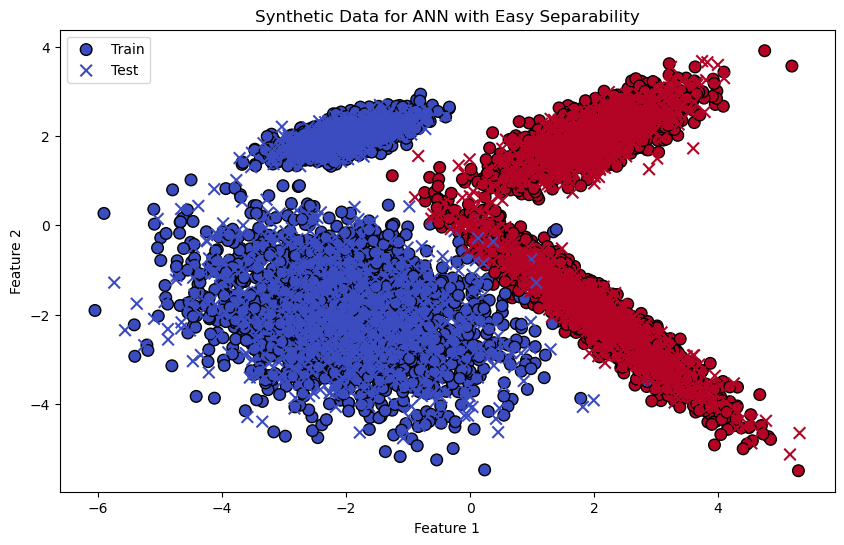

In [4]:
# Plot the generated dataset
plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', marker='o', edgecolor='k', s=70, label='Train')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolor='k', s=70, label='Test')
plt.title("Synthetic Data for ANN with Easy Separability")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [5]:
# clf = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=200, min_samples_leaf=50)
clf = tree.DecisionTreeClassifier(criterion='gini', min_samples_split=200, min_samples_leaf=50, max_depth=3)

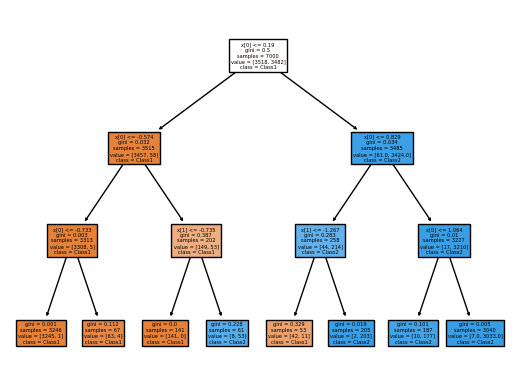

In [6]:
# clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)
plot2 = plt.figure(1)
#tree.plot_tree(clf, feature_names=['Var1', 'Var2'], class_names=['Class1', 'Class2'], filled=True)
tree.plot_tree(clf, class_names=['Class1', 'Class2'], filled=True)
plt.show()


In [7]:
y_pred = clf.predict(X_train)
print("Training performance: ", accuracy_score(y_train, y_pred))
y_pred = clf.predict(X_test)
print("Testing performance: ", accuracy_score(y_test, y_pred))

Training performance:  0.9938571428571429
Testing performance:  0.9933333333333333


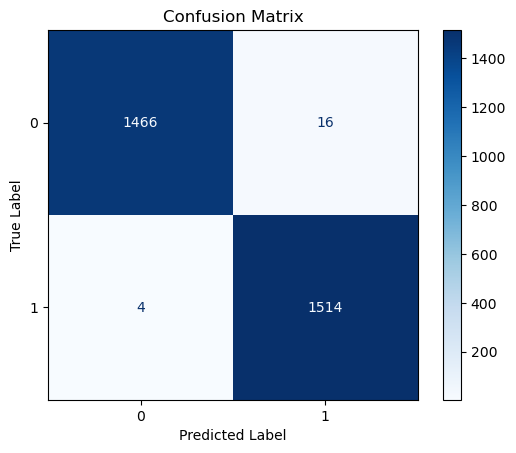

In [8]:
# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

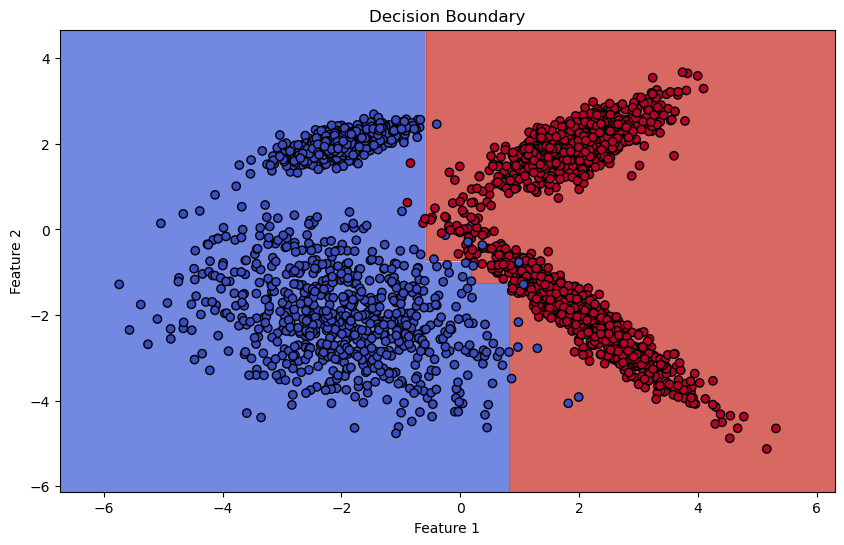

In [9]:
# Plot the decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                         np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.8, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', cmap='coolwarm')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary')

plt.figure(figsize=(10, 6))
plot_decision_boundary(X_test, y_test, clf)
plt.show()

In [ ]:
# Shap explainer
explainer = shapely.
explainer = shap.Explainer(clf)
shap_values = explainer(X)

NameError: name 'shap' is not defined